# Define the system  

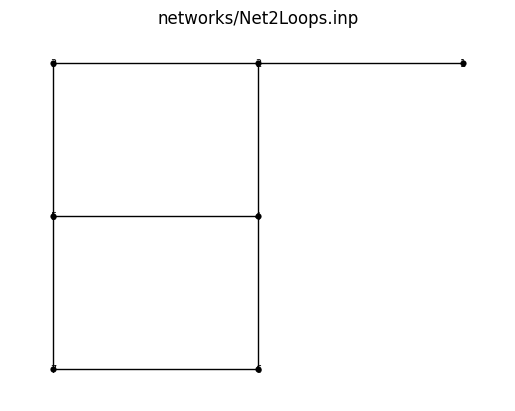

<Axes: title={'center': 'networks/Net2Loops.inp'}>

In [1]:
import wntr
import wntr_quantum

# Create a water network model
inp_file = 'networks/Net0.inp'
inp_file = 'networks/Net2Loops.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)


## Run with the original Cholesky EPANET simulator

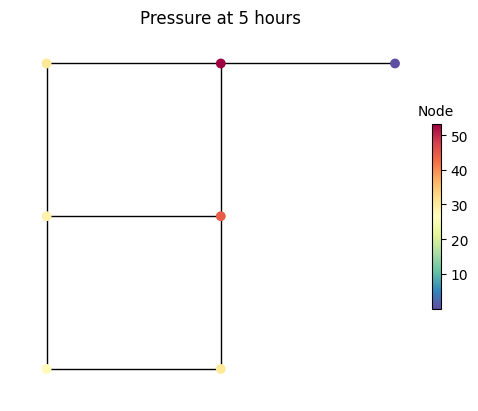

<Axes: title={'center': 'Pressure at 5 hours'}>

In [2]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Run with our custom Cholesky EPANET solver 
we use the default solver of the QuantumWNTRSimulator, that uses a LU solver, a s a benchmark of the calculation

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so


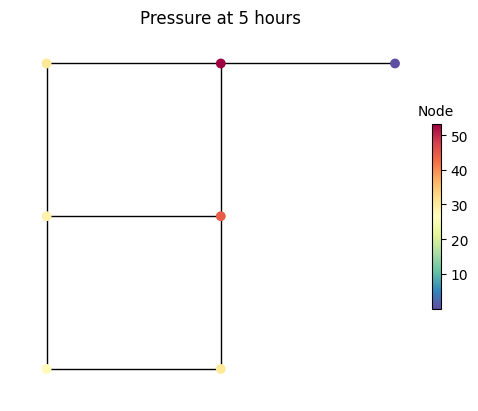

<Axes: title={'center': 'Pressure at 5 hours'}>

In [3]:
sim = wntr_quantum.sim.QuantumEpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Run with our custum SPLU EPANET Solver

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so


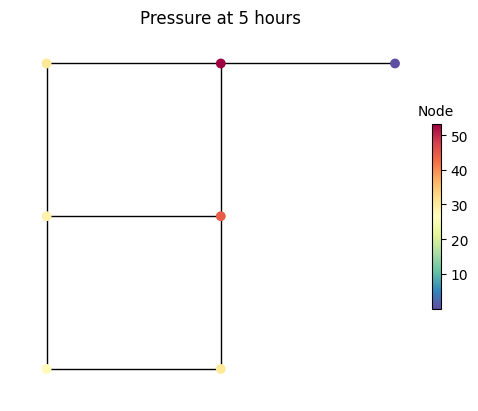

<Axes: title={'center': 'Pressure at 5 hours'}>

In [4]:
from quantum_newton_raphson.splu_solver import SPLU_SOLVER
sim = wntr_quantum.sim.QuantumEpanetSimulator(wn, linear_solver=SPLU_SOLVER())
results = sim.run_sim(linear_solver=SPLU_SOLVER())
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Run with the AEQUBOLS solver

In [5]:
from quantum_newton_raphson.qubo_solver import QUBO_SOLVER

qubols_solver = QUBO_SOLVER(
    num_qbits=11,
    num_reads=100,
    iterations=5,
    range=1000,
    offset=0,
    temperature=1e4,
    use_aequbols=True,
)

sim = wntr_quantum.sim.QuantumEpanetSimulator(wn, linear_solver=qubols_solver)
results = sim.run_sim(linear_solver=qubols_solver)

# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

{'num_qbits': 11, 'num_reads': 100, 'iterations': 5, 'range': 1000, 'offset': 0, 'temperature': 10000.0, 'encoding': <class 'qubols.encodings.RangedEfficientEncoding'>}
/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so
0 [0, 0, 0, 0, 0, 0] 1000
1 [599.2179863147605, 632.453567937439, 648.0938416422288, 665.6891495601174, 625.6109481915934, 575.7575757575758] [608.9117217792331, 502.0178288587043, 393.79189513621327, 241.12157811671472, 601.9341350965025, 620.5401377503177]
2 [694.453446221581, 690.8505587821953, 691.2069328008366, 690.4376986336805, 696.8074587944055, 692.2225869482512] [291.66024338767266, 181.38036489487914, 133.42394070471582, 78.69596271634622, 260.2122262336027, 355.7572830250526]
3 [657.9602779384704, 668.6877575975816, 674.5126371896894, 680.5141608131441, 661.4511543501526, 641.7975566074568] [110.24030685701622, 66.12249250572188, 47.89702942432045, 27.757997452188118, 90.85275953956936, 132.5466900453059]
4 [6

In [1]:
import sys
import os 
epanet_path = os.environ["EPANET_QUANTUM"]
epanet_tmp = os.environ["EPANET_TMP"]
util_path = os.path.join(epanet_path, 'src/py/')
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append(util_path)
from quantum_linsolve import load_json_data 
A, b = load_json_data(os.path.join(epanet_tmp,'smat.json'))

In [2]:
from quantum_newton_raphson.qubo_solver import QUBO_SOLVER
linear_solver = QUBO_SOLVER(
    num_qbits=11,
    num_reads=100,
    iterations=5,
    range=1000,
    offset=0,
    temperature=1e4,
    use_aequbols=True,
)

{'num_qbits': 11, 'num_reads': 100, 'iterations': 5, 'range': 1000, 'offset': 0, 'temperature': 10000.0, 'encoding': <class 'qubols.encodings.RangedEfficientEncoding'>}


In [3]:
qubo_sol = linear_solver(A, b)

0 [0, 0, 0, 0, 0, 0] 1000
1 [576.7350928641251, 618.7683284457478, 636.3636363636364, 655.9139784946237, 593.3528836754643, 540.5669599217987] [622.5719917955751, 493.7987483200178, 400.39489433959386, 263.5259160439614, 622.0826686332786, 633.8382378996654]
2 [579.7779667243186, 620.2164186167743, 637.1464220808203, 655.6563774036716, 589.7043049738029, 541.8061353624628] [300.6329853537962, 191.51202835045635, 148.87180214481722, 96.42500070474858, 282.02971047515985, 360.6894595164525]
3 [635.9078789457997, 655.7856125430565, 665.0871708704634, 674.0365095028172, 647.0475892150866, 614.7902195461438] [122.28570508559014, 76.78688319908353, 59.429265142580846, 38.37335880132162, 114.88309601840658, 152.78643738130938]
4 [605.1870322136429, 636.570125951572, 650.1572381806851, 664.4337921488208, 618.1864423743374, 576.2575709800188] [45.52662346644498, 28.41386393039544, 21.82471527489312, 14.031217708388862, 41.45297888416699, 55.011264427028955]


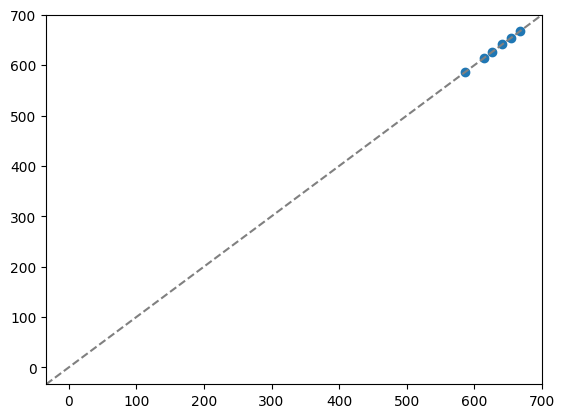

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
np_sol = np.linalg.solve(A.todense(), b)
plt.scatter(np_sol, qubo_sol.solution)
plt.axline((0, 0), slope=1, linestyle="--", color="gray")
plt.show()

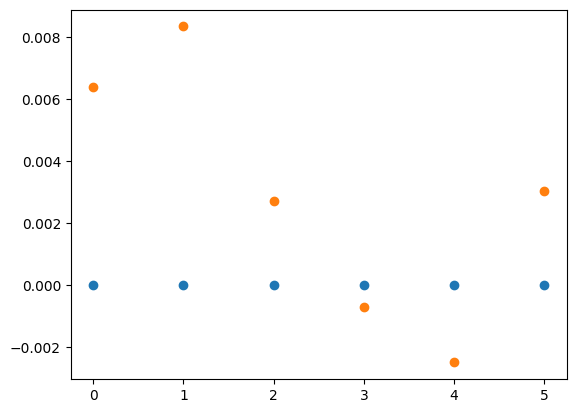

In [10]:
plt.scatter( list(range(6)), (A@np_sol-b))
plt.scatter(list(range(6)), (A@qubo_sol.solution-b))